In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
df = pd.read_csv("iris.csv")

# Separate features and target
X = df.iloc[:, :-1]  # all columns except the last one
y = df.iloc[:, -1]   # last column

# Split into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate SVM with linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

print("SVM with Linear Kernel")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))

# Train and evaluate SVM with RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print("\nSVM with RBF Kernel")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))


SVM with Linear Kernel
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

SVM with RBF Kernel
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Accuracy Score: 0.99125
Confusion Matrix:
 [[3836   15]
 [  20  129]]


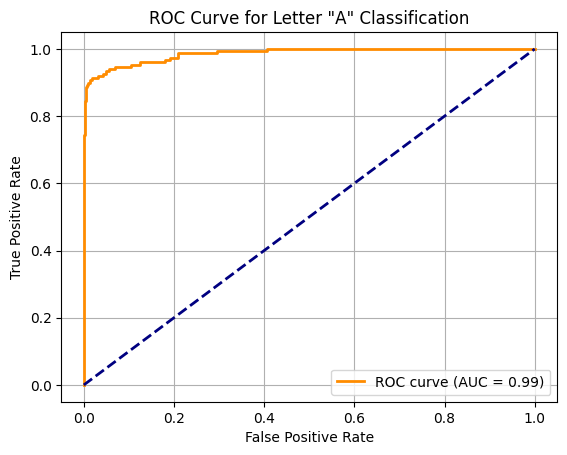

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Load the letter recognition dataset
df = pd.read_csv('letter-recognition.csv')  # Make sure your CSV is in the same dir

# Assuming first column is the label
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Binarize labels for ROC and AUC (only for binary classification or One-vs-Rest setup)
lb = LabelBinarizer()
y_bin = lb.fit_transform(y)

# For simplicity, consider binary classification (e.g., classify only A vs not-A)
# You can pick a letter, e.g., 'A'
target_letter = 'A'
y_binary = (y == target_letter).astype(int)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Train SVM
svm_clf = SVC(kernel='linear', probability=True)
svm_clf.fit(X_train, y_train)

# Predict
y_pred = svm_clf.predict(X_test)
y_proba = svm_clf.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Accuracy and Confusion Matrix
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for Letter "{target_letter}" Classification')
plt.legend(loc="lower right")
plt.grid()
plt.show()


SVM with Linear Kernel
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


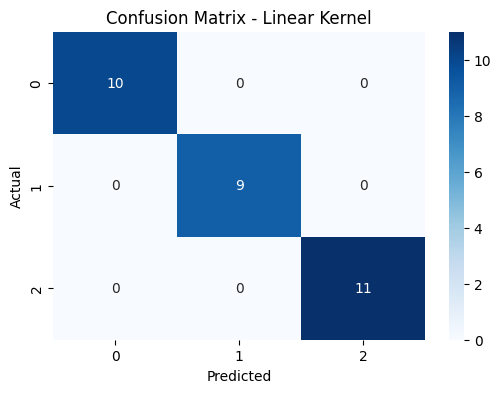


SVM with RBF Kernel
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


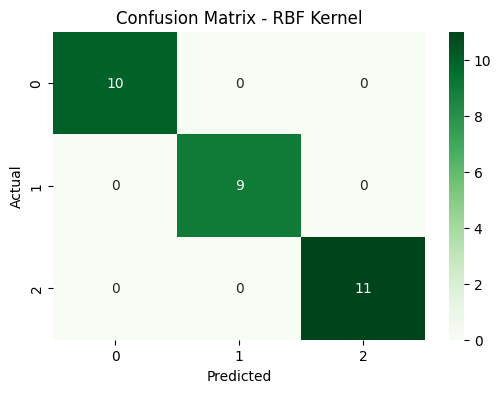

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("iris.csv")

# Separate features and target
X = df.iloc[:, :-1]  # all columns except the last one
y = df.iloc[:, -1]   # last column

# Split into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate SVM with linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

print("SVM with Linear Kernel")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))

# Plot confusion matrix for linear kernel
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_linear), annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix - Linear Kernel")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Train and evaluate SVM with RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print("\nSVM with RBF Kernel")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))

# Plot confusion matrix for RBF kernel
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rbf), annot=True, cmap='Greens', fmt='g')
plt.title("Confusion Matrix - RBF Kernel")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


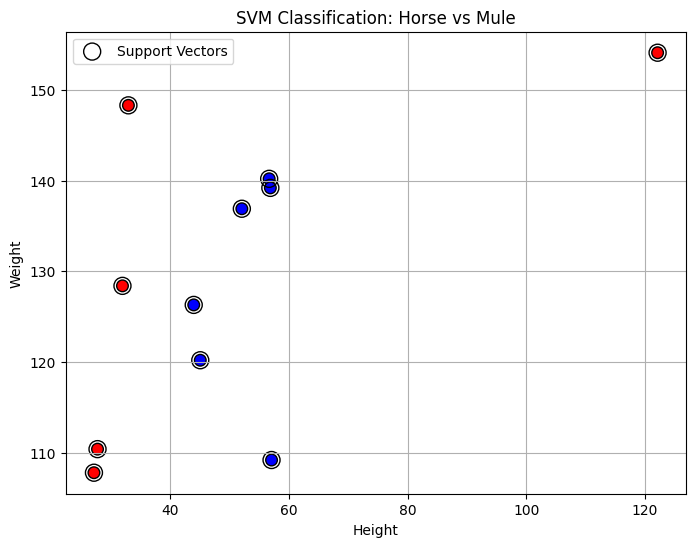

Accuracy: 0.9090909090909091
Support Vectors:
 [[ 44.  126.3]
 [ 52.1 136.9]
 [ 57.1 109.2]
 [ 45.1 120.2]
 [ 56.7 140.2]
 [ 56.9 139.2]
 [ 33.  148.3]
 [ 27.8 110.4]
 [ 27.2 107.8]
 [ 32.  128.4]
 [122.1 154.1]]


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score

# Step 1: Create dataset
data = {
    "Height": [44.0, 52.1, 57.1, 33.0, 27.8, 27.2, 32.0, 45.1, 56.7, 56.9, 122.1],
    "Weight": [126.3, 136.9, 109.2, 148.3, 110.4, 107.8, 128.4, 120.2, 140.2, 139.2, 154.1],
    "Label":  ["Horse", "Horse", "Horse", "Mule", "Mule", "Mule", "Mule", "Horse", "Horse", "Horse", "Mule"]
}
df = pd.DataFrame(data)

# Step 2: Save CSV
df.to_csv("horses_mules_dataset.csv", index=False)

# Step 3: Load dataset
df = pd.read_csv("horses_mules_dataset.csv")

# Step 4: Preprocess data
X = df[["Height", "Weight"]].values
y = df["Label"].map({"Horse": 0, "Mule": 1}).values  # Convert to numeric

# Step 5: Train SVM model
model = svm.SVC(kernel='linear')
model.fit(X, y)

# Step 6: Plot data and support vectors
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=70, edgecolors='k')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("SVM Classification: Horse vs Mule")

# Plot support vectors
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=150, facecolors='none', edgecolors='k', label='Support Vectors')
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Accuracy
y_pred = model.predict(X)
acc = accuracy_score(y, y_pred)
print("Accuracy:", acc)

# Step 8: Support Vectors
print("Support Vectors:\n", model.support_vectors_)